# **1. PCA(Principal Component Analysis)**
- 사이킷런에서 제공하는 `유방암(breast cancer)` 데이터 세트로 PCA 실습을 진행합니다.

**데이터 준비**  
- 아래 코드를 실행해 주세요.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
cancer = load_breast_cancer()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = cancer.feature_names
cancerDF = pd.DataFrame(cancer.data, columns=columns)
cancerDF['target'] = cancer.target
cancerDF.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## **1-1. 악성/양성 종양에 따라 원본 유방암 데이터 세트가 어떻게 분포돼 있는지 두 개의 속성(`mean_radius`, `mean texture`)을 각각 X축, Y축으로 해서 2차원으로 시각화 해주세요.**

- 아래 코드를 완성해 주세요.

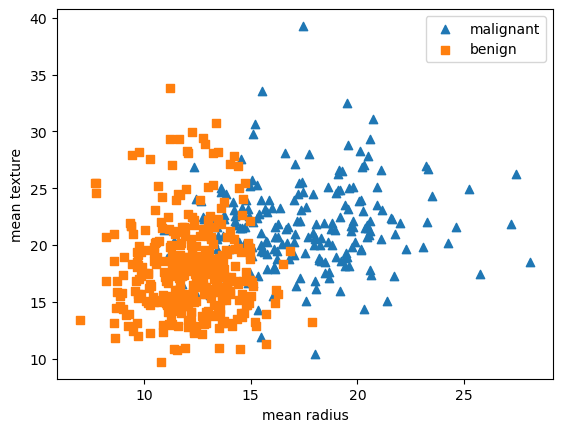

In [2]:
# 악성(malignant)은 세모, 양성(benign)은 네모로 표현
markers=['^', 's']

# 악성은 0, 양성은 1
for i, marker in enumerate(markers):
    ###빈칸###
    x_axis_data = cancerDF[cancerDF['target'] == i]['mean radius']
    y_axis_data = cancerDF[cancerDF['target'] == i]['mean texture']
    plt.scatter(x_axis_data, y_axis_data, marker = marker,label = cancer.target_names[i])

plt.legend()
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

## **1-2. 스케일링이 적용된 데이터 세트에 PCA를 적용해 유방암 데이터를 2차원 PCA 데이터로 변환 해주세요.**

**스케일링 적용**  
- 아래 코드를 실행해 주세요.

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포로 변환
cancer_scaled = StandardScaler().fit_transform(cancerDF.iloc[:, :-1])

**문제**  
- 아래 코드를 완성해 주세요.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) ###빈칸###

# fit( )과 transform( )을 호출하여 PCA 변환 데이터 반환
pca.fit(cancer_scaled)
cancer_pca = pca.transform(cancer_scaled)###빈칸###
print(cancer_pca.shape)

(569, 2)


## **1-3. 2개의 속성으로 PCA 변환된 데이터 세트를 pca_component_1 속성을 X축으로, pca_component_2 속성을 Y축으로 해서 2차원상에서 시각화 해주세요.**

- 아래 코드를 완성해 주세요.

In [5]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 지정

pca_columns = ['pca_component_1', 'pca_component_2']###빈칸###
cancerDF_pca = pd.DataFrame(cancer_pca, columns=pca_columns)
cancerDF_pca['target'] = cancer.target
cancerDF_pca.head()

,pca_component_1,pca_component_2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


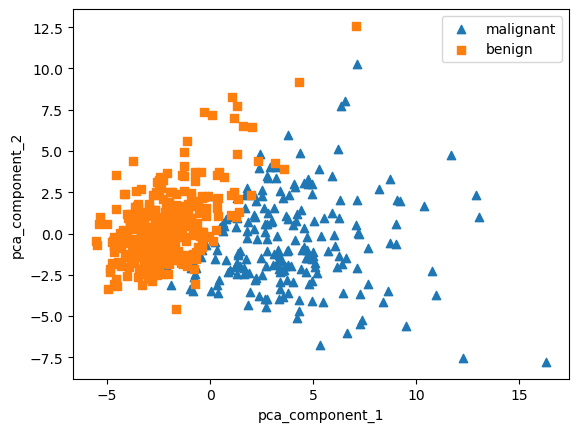

In [6]:
# 악성을 세모, 양성을 네모로 표시
markers=['^', 's']

# pca_component_1 을 x축, pca_component_2 를 y축으로 scatter plot 시각화
for i, marker in enumerate(markers):
    ###빈칸###
    x_axis_data = cancerDF_pca[cancerDF_pca['target'] == i]['pca_component_1']
    y_axis_data = cancerDF_pca[cancerDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=cancer.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

## **1-4. PCA 객체의 속성을 사용하여 PCA component 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 확인 해주세요.**

In [7]:
###답안###
print('PCA component 별 변동성 비율: ', pca.explained_variance_ratio_)
print('누적 변동성 비율: ', pca.explained_variance_ratio_.cumsum())

PCA component 별 변동성 비율:  [0.44272026 0.18971182]
누적 변동성 비율:  [0.44272026 0.63243208]


# **2. 차원을 선택하는 방법**

## **Scree Plot을 통해 적절한 차원 수를 선택하고 이유를 설명하세요.**


### **Scree Plot에 대한 설명**
- PCA 분석 후 주성분의 수를 결정하기 위해 활용하는 plot
- x축에 주성분, y축에 해당 주성분에 대응하는 고유값을 연결하며, 보통 그래프가 완만해지는 부분까지의 주성분을 활용
  - 주성분의 설명된 분산(explained variance)의 누적 비율이 안정화 되는 지점을 선택

In [8]:
### Scree Plot 시각화

def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components) + 1
    vals = pca.explained_variance_ratio_

    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db', '#9b59b6'])  # Bar plot
    ax.plot(ind, cumvals, color='#c0392b')

    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]),
        					  va="bottom", ha="center", fontsize=13)

    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')

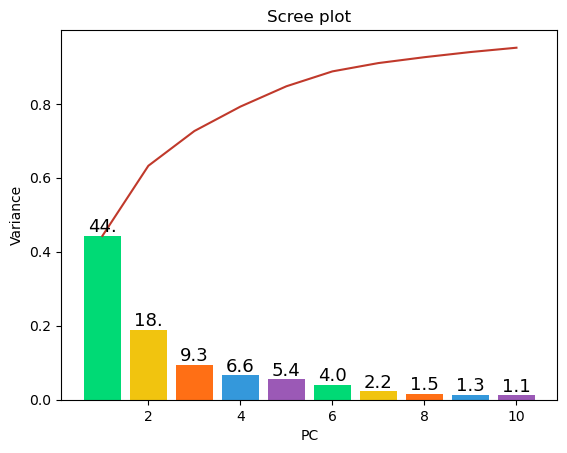

In [9]:
import numpy as np

# PCA를 수행하여 각 주성분의 설명된 분산의 비율을 계산
pca2 = PCA(n_components = 10)
pca2.fit(cancer_scaled)

# Scree Plot을 그려서 각 주성분의 설명된 분산의 비율을 시각화
scree_plot(pca2)

**답안**  
적절한 Principal Component 수는 3개인 것 같다. 그 이유는 Scree Plot에서 그래프가 완만해지기 시작하는 지점이 세 번째 주성분 이후이기 때문이다. 또한, 설명된 분산의 누적 비율이 세 번째 주성분 이후로는 큰 변동 없이 안정화되기 시작하는데, 그렇기 때문에 세 개의 주성분이 원본 데이터의 대부분의 분산을 잘 설명한다고 할 수 있다.

# **3. LDA**
- 사이킷런에서 제공하는 `와인` 데이터 세트로 LDA 실습을 진행합니다.

**데이터 준비**  
- 아래 코드를 실행해 주세요.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# 와인 데이터셋 불러오기
wine = load_wine()

# 데이터 표준화
wine_scaled = StandardScaler().fit_transform(wine.data)

## **3-1. 2개의 컴포넌트로 와인 데이터를 LDA 변환 해주세요.**

In [11]:
# 코드를 완성해 주세요.

lda = LinearDiscriminantAnalysis(n_components=2)###빈칸###
lda.fit(wine_scaled, wine.target)
wine_lda = lda.transform(wine_scaled)###빈칸###
print(wine_lda.shape)

(178, 2)


## **3-2. LDA 변환된 입력 데이터 값을 2차원 평면에 와인 종류별로 표현해 주세요.**

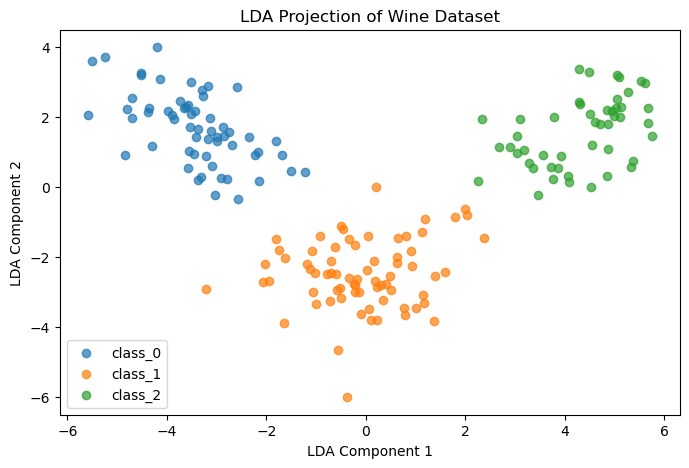

In [12]:
# 변환된 데이터를 2차원 평면에 각 와인 종류별로 시각화

plt.figure(figsize = (8, 5))

for i in range(3):
    plt.scatter(wine_lda[wine.target == i, 0], wine_lda[wine.target == i, 1],
                         label = wine.target_names[i], alpha = 0.7)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of Wine Dataset')

plt.legend(loc='best')
plt.show()

# **4. SVD**
- 와인 데이터셋을 계속 활용합니다.

## **4-1. 2개의 컴포넌트로 와인 데이터를 TruncatedSVD 변환 해주세요.**


In [13]:
# 코드를 완성해 주세요.
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline

wine_ftrs = wine.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)###빈칸###
tsvd.fit(wine_ftrs)
wine_tsvd = tsvd.transform(wine_ftrs)###빈칸###

**시각화**  
- 2차원 scatter plot으로 시각화

Text(0, 0.5, 'TruncatedSVD Component 2')

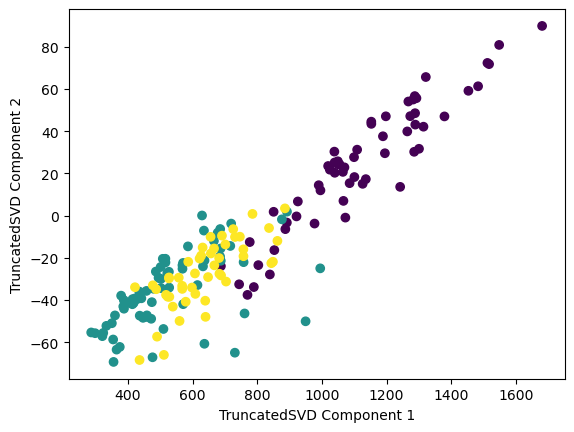

In [14]:
plt.scatter(x = wine_tsvd[:, 0], y = wine_tsvd[:, 1], c = wine.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

## **4-2. 와인 데이터를 스케일링으로 변환한 후 TruncatedSVD와 PCA 클래스 변환을 하여 두 결과를 비교해주세요.**

In [15]:
# 코드를 완성해주세요.
from sklearn.preprocessing import StandardScaler

# 와인 데이터를 StandardScaler로 변환
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine.data)###빈칸###

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)###빈칸###
tsvd.fit(wine_scaled)
wine_tsvd = tsvd.transform(wine_scaled)###빈칸###

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)###빈칸###
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)###빈칸###

**시각화**  
- 2차원 scatter plot으로 시각화

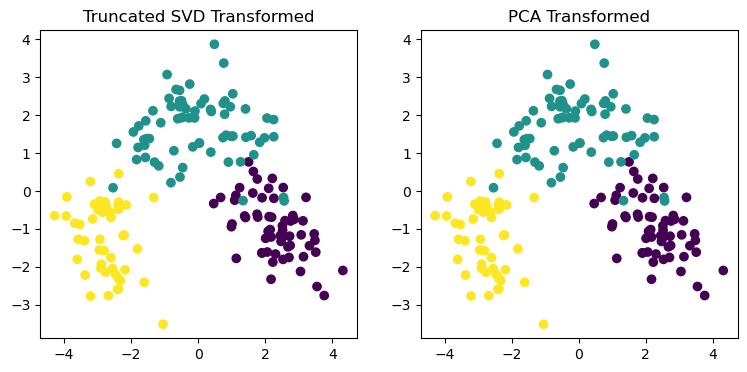

In [16]:
# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현

fig, (ax1, ax2) = plt.subplots(figsize = (9, 4), ncols = 2)

ax1.scatter(x = wine_tsvd[:, 0], y = wine_tsvd[:, 1], c = wine.target)
ax2.scatter(x = wine_pca[:, 0], y = wine_pca[:, 1], c = wine.target)

ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

plt.show()

## **4-3. 위에서 보인 두 결과가 비슷한가요, 다른가요? 간단히 비교하고 설명해주세요.**

### **답안**  
두 결과는 비슷하게 보이지만 약간의 차이가 존재한다.. Truncated SVD는 원본 데이터에 대해 직접 적용되며, PCA는 스케일링된 데이터에 대해 적용된다. 하지만 두 방법 모두 데이터의 주요 변동성을 유지하며 차원을 축소하기 때문에 전체적인 분포는 비슷하게 나타난다. Truncated SVD는 원래 고차원 데이터의 희소성을 보존할 수 있는 반면, PCA는 데이터를 완전히 중심화하고 스케일링하여 희소성을 보존하지 않는다.








# **5. NMF**
- 와인 데이터셋을 계속 활용합니다.

## **5-1. 와인 데이터를 NMF를 이용하여 분할한 후 시각화하는 코드를 완성해주세요.**

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

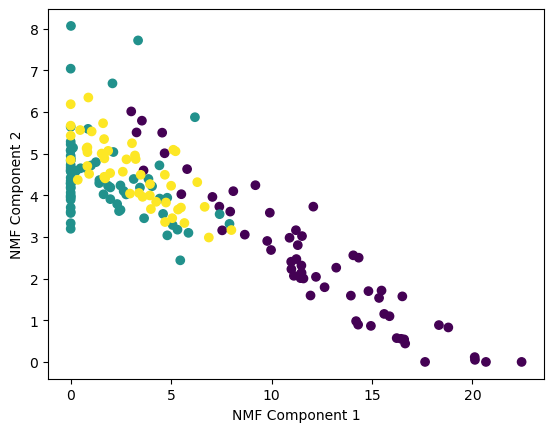

In [18]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, random_state=42)###빈칸###

nmf.fit(wine_ftrs)
wine_nmf = nmf.transform(wine_ftrs)###빈칸###

plt.scatter(x = wine_nmf[:,1], y = wine_nmf[:,0], c = wine.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

# **6. T-SNE**
- `유방암(breast cancer)` 데이터 세트를 활용합니다.

## **6-1. T-SNE를 적용하여 차원을 2차원으로 축소 해주세요.**

In [19]:
from sklearn.manifold import TSNE

# 표준화
cancer_norm = StandardScaler().fit_transform(cancerDF.iloc[:, :-1])

# 차원 축소
tsne = TSNE(random_state = 42)
canc_tsne = tsne.fit_transform(cancer_norm)
print('Number of Features in Breast Cancer Dataset Before T-SNE : {}\n\nNumber of Featrues in Breast Cancer Dataset After T-SNE: {}'.format(cancerDF.shape[1], canc_tsne.shape[1]))

Number of Features in Breast Cancer Dataset Before T-SNE : 31

Number of Featrues in Breast Cancer Dataset After T-SNE: 2


## **6-2. T- SNE를 적용한 데이터를 이용해 시각화를 진행 해주세요.**

In [20]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns

In [21]:
### 데이터 시각화

def plot_labelled_scatter (X, y, class_labels, s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)

    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm=bnorm, alpha=0.4, edgecolor='black', lw=1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)

    plt.grid(which='both', color='lightslategrey', alpha=0.3)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
        plt.legend(handles=h, fontsize=15, frameon=False)

Text(0.5, 1.0, 'Breast Cancer Dataset T-SNE')

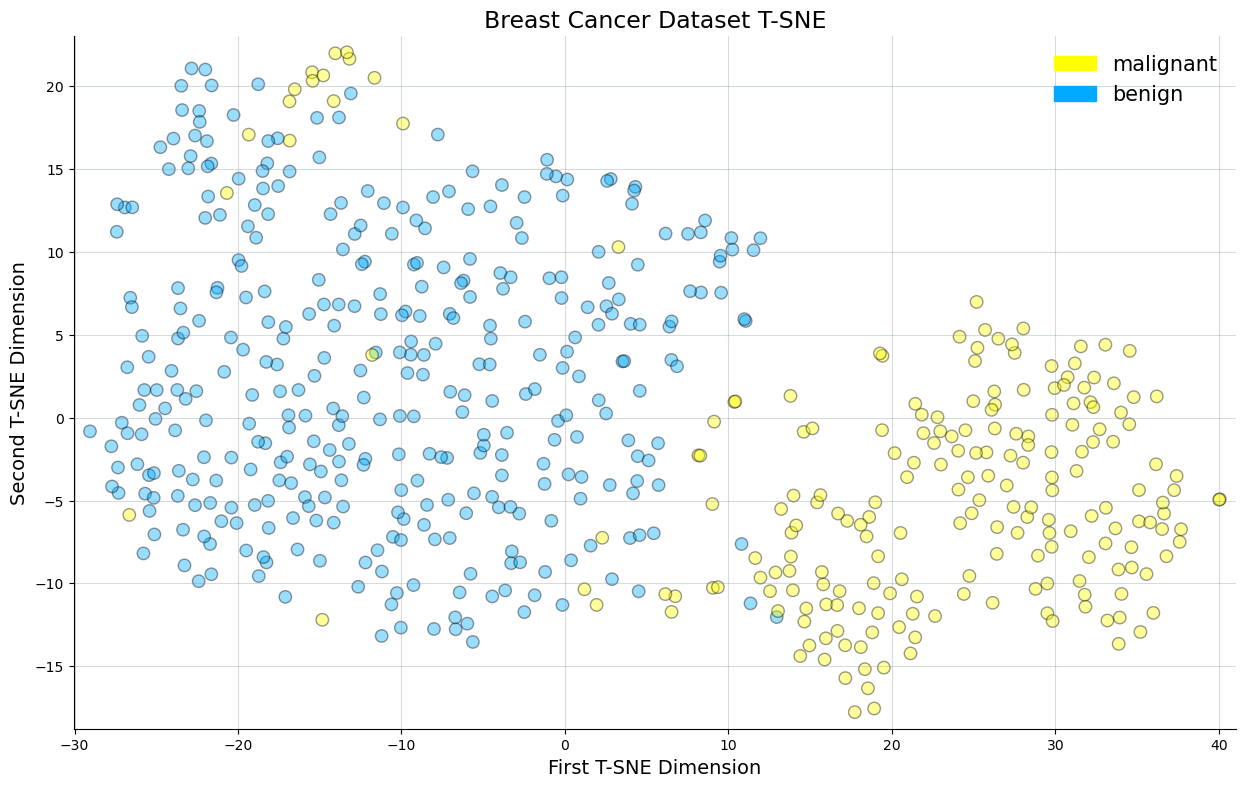

In [22]:
plot_labelled_scatter(canc_tsne, cancer.target, ['malignant', 'benign'], (15, 9))

plt.xlabel('First T-SNE Dimension', fontsize=14)
plt.ylabel('Second T-SNE Dimension', fontsize=14)
plt.title('Breast Cancer Dataset T-SNE', fontsize=17)